# Lab 8

In [11]:
import numpy as np 
import pandas as pd
from sklearn import cluster
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

## Part 1

### Compound Dataset

In [2]:
#importing the data 
#Load the data
compound_data = pd.read_csv("../data/compound.txt", sep="\t", header = None)
compound_data.columns = ['feature_1', 'feature_2', 'class']
compound_data_new = compound_data.drop('class', axis=1)
compound_data_new

,feature_1,feature_2
0,26.75,22.15
1,29.80,22.15
2,31.55,21.10
3,27.70,20.85
4,29.90,19.95
...,...,...
394,15.85,9.95
395,15.35,9.90
396,15.60,9.45
397,15.30,9.15


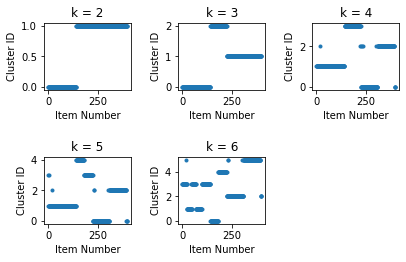

In [4]:
numClusters = [2, 3, 4, 5, 6]
subplot_list = [231, 232, 233, 234, 235]
SSE = []
for index, k in enumerate (numClusters):
    k_means = cluster.KMeans(n_clusters=k)
    k_means.fit(compound_data_new)
    SSE.append(k_means.inertia_)
    labels = k_means.labels_
    
    # Plot clustering results vs k
    plt.subplot(subplot_list[index])
    plt.plot(compound_data.index, labels, '.')
    plt.title("k = " + str(k))
    plt.xlabel('Item Number')
    plt.ylabel('Cluster ID')
    plt.tight_layout(pad=2.0)


Text(0, 0.5, 'SSE')

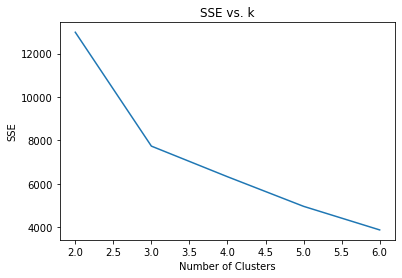

In [5]:
# Plot SSE vs k
plt.plot(numClusters, SSE)
plt.title("SSE vs. k")
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')

### Flame Dataset

In [39]:
#importing the data 
#Load the data
flame_data = pd.read_csv("../data/flame.txt", sep="\t", header = None)
flame_data.columns = ['feature_1', 'feature_2', 'class']
flame_data_new = flame_data.drop('class', axis=1)
flame_data_new

,feature_1,feature_2
0,1.85,27.80
1,1.35,26.65
2,1.40,23.25
3,0.85,23.05
4,0.50,22.35
...,...,...
235,7.50,26.20
236,7.50,25.65
237,7.05,25.85
238,6.90,27.15


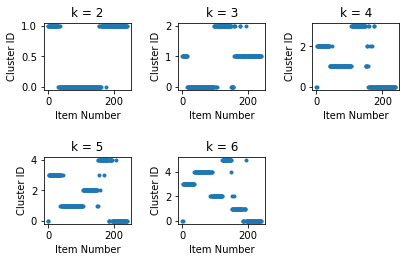

In [7]:
numClusters = [2, 3, 4, 5, 6]
subplot_list = [231, 232, 233, 234, 235]
SSE = []
for index, k in enumerate (numClusters):
    k_means = cluster.KMeans(n_clusters=k)
    k_means.fit(flame_data_new)
    SSE.append(k_means.inertia_)
    labels = k_means.labels_
    
    # Plot clustering results vs k
    plt.subplot(subplot_list[index])
    plt.plot(flame_data.index, labels, '.')
    plt.title("k = " + str(k))
    plt.xlabel('Item Number')
    plt.ylabel('Cluster ID')
    plt.tight_layout(pad=2.0)

Text(0, 0.5, 'SSE')

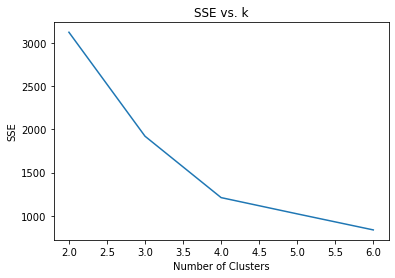

In [8]:
# Plot SSE vs k
plt.plot(numClusters, SSE)
plt.title("SSE vs. k")
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')

#### Discussion:
- From part (2) it can be seen that as k increases, the number of classifications made by the model also increases
- From part (3) it can be seen that as the number of clusters increases, the SSE decreases and model more accuratley classifies the set

## Part 2

### Compound Dataset

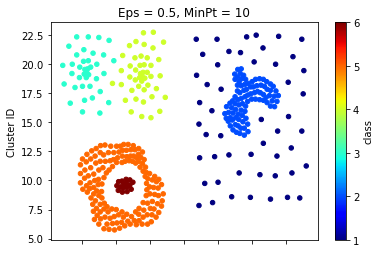

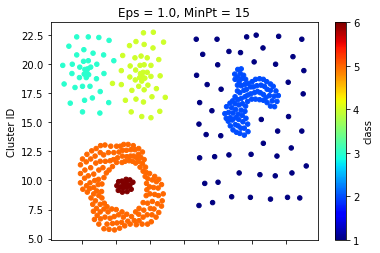

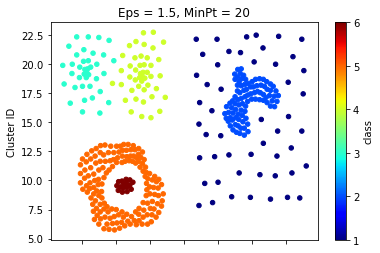

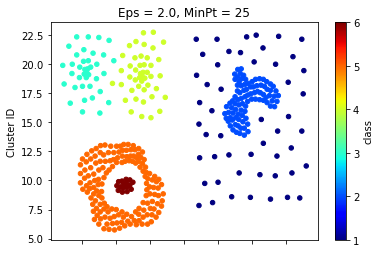

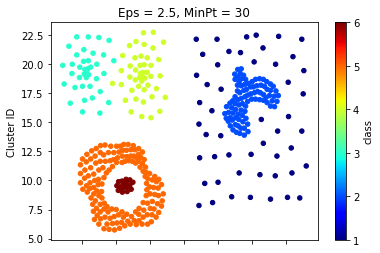

In [9]:
eps = [0.5, 1.0, 1.5, 2.0, 2.5]
min_samples = [10, 15, 20, 25, 30]
for index in range(len(eps)):
    db = DBSCAN(eps=eps[index], min_samples=min_samples[index]).fit(compound_data_new)
    core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
    core_samples_mask[db.core_sample_indices_] = True
    result = compound_data
    # Plot clustering results vs k
    result.plot.scatter(x='feature_1', y='feature_2', c='class', colormap='jet')
    plt.title("Eps = " + str(eps[index]) + ", " + "MinPt = "  + str(min_samples[index]))
    plt.xlabel('Item Number')
    plt.ylabel('Cluster ID')

#### Determine Eps and MinPt

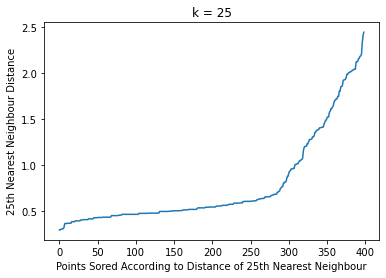

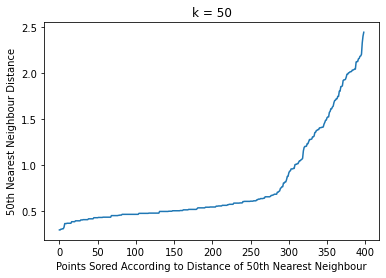

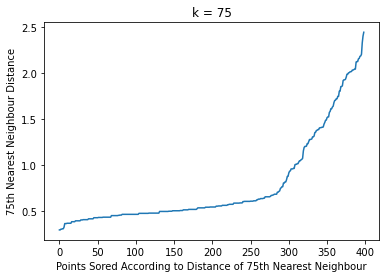

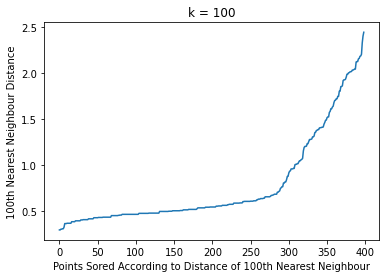

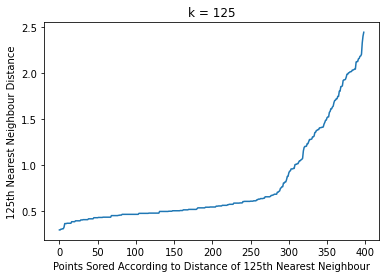

In [65]:
k = [25, 50, 75, 100, 125]
for index in range(len(k)):
    neigh = NearestNeighbors(n_neighbors=k[index])
    nbrs = neigh.fit(compound_data_new)
    distances, indices = nbrs.kneighbors(compound_data_new)
    
    distances = np.sort(distances, axis=0)
    distances = distances[:,1]
    
    plt.plot(distances)
    plt.title("k = " + str(k[index]))
    plt.xlabel('Points Sored According to Distance of {}th Nearest Neighbour'.format(k[index]))
    plt.ylabel('{}th Nearest Neighbour Distance'.format(k[index]))
    plt.show()

#### Discussion:
 - From the plots above it can be seen that the estimations would be the following:
     - Eps = 0.65
     - MinPt = [25, 50, 75, 100, 125]

### Flame Dataset

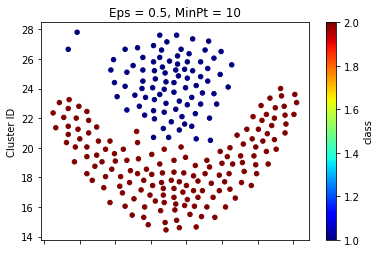

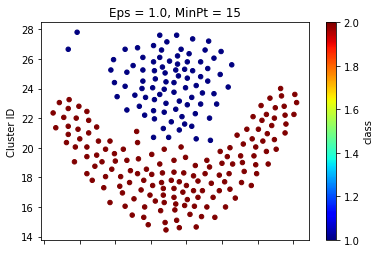

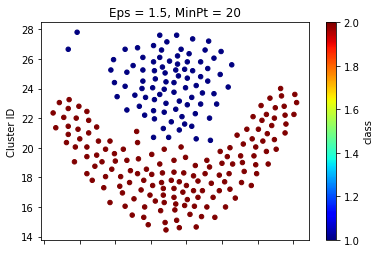

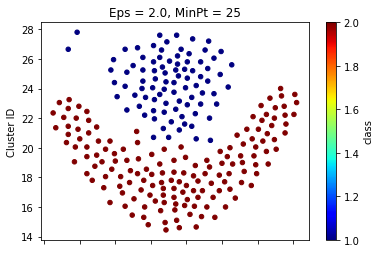

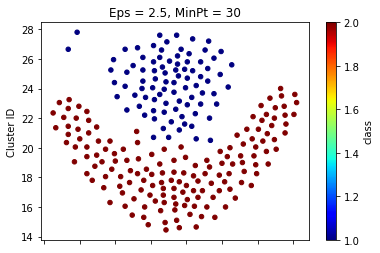

In [64]:
eps = [0.5, 1.0, 1.5, 2.0, 2.5]
min_samples = [10, 15, 20, 25, 30]
for index in range(len(eps)):
    db = DBSCAN(eps=eps[index], min_samples=min_samples[index]).fit(flame_data_new)
    core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
    core_samples_mask[db.core_sample_indices_] = True
    result = flame_data
    # Plot clustering results vs k
    result.plot.scatter(x='feature_1', y='feature_2', c='class', colormap='jet')
    plt.title("Eps = " + str(eps[index]) + ", " + "MinPt = "  + str(min_samples[index]))
    plt.xlabel('Item Number')
    plt.ylabel('Cluster ID')

#### Determine Eps and MinPt

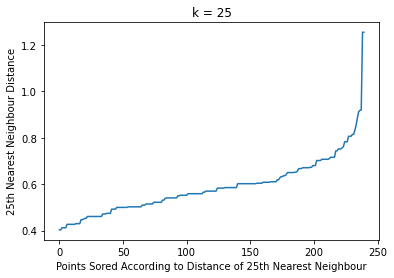

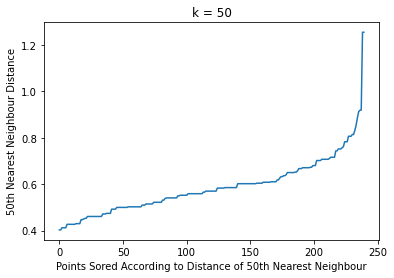

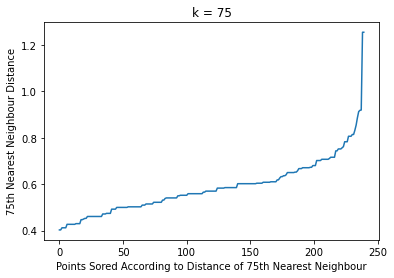

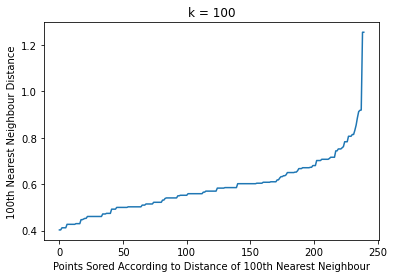

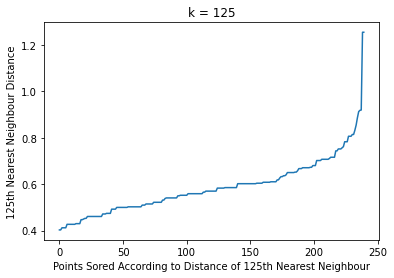

In [63]:
k = [25, 50, 75, 100, 125]
for index in range(len(k)):
    neigh = NearestNeighbors(n_neighbors=k[index])
    nbrs = neigh.fit(flame_data_new)
    distances, indices = nbrs.kneighbors(flame_data_new)
    
    distances = np.sort(distances, axis=0)
    distances = distances[:,1]
    
    plt.plot(distances)
    plt.title("k = " + str(k[index]))
    plt.xlabel('Points Sored According to Distance of {}th Nearest Neighbour'.format(k[index]))
    plt.ylabel('{}th Nearest Neighbour Distance'.format(k[index]))
    plt.show()

#### Discussion:
- From the plots above it can be seen that the estimations would be the following:
 - Eps = 0.7
 - MinPt = [25, 50, 75, 100, 125]

## Part 3


#### Discussion:
- Advantages of K-means:
    - Guarantees convergence
    - Can warm-start the positions of centroids
    - Easily adapts to new examples
    
    
- Limitations of K-means:
    - Has problems when clusters are of differing: sizes, densities, and non-globular shapes
    - Has problems when the data contains outliers
    
    
- Advantages of DBSCAN:
    - Resistant to noise
    - Can handle clusters of different shapes and sizes


- Limitations of DBSCAN:
    - Does not work well with varying densities
    - Does not work well with high-dimensional data